RFM:
- What: RFM là một phần của Marketing Analysis và được sử dụng để phân
tích giá trị khách hàng (Customer Value)
  - R(Recency): lần gần nhất mua hàng
  - F(Frequence): tần suất mua hàng
  - M(Monetary): số tiền đã bỏ ra để mua hàng
- Why:
  - Hành vi khách hàng
  - Tỉ lệ churn
  - Phân khúc khách hàng
- For what:
  - Discount
  - Hành động mua tiếp theo của khách hàng

=> Định hướng làm bài:

- Lọc data
  - Lọc data null ở customerID
  - Những InvoiceNo có giá trị C ở đầu sẽ trừ trực tiếp cho những InvoiceNo của những CustomerID đó (ví dụ customer mua 1 đơn hàng nhưng hủy thì sẽ không tính là mua đơn nào) => thiếu sót ở điểm không thấy được feedback
- Xử lí data
  - Phân loại dữ liệu khách hàng theo từng năm
  - So sánh tiềm năng của khách hàng trong quá khứ đến hiện tại

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
path = '/content/drive/MyDrive/DAC/Python/Final Project/ecommerce retail.xlsx'
pf = pd.read_excel(path, sheet_name=['ecommerce retail','Segmentation'])

In [ ]:
df_sheet0 = pf['ecommerce retail']
df_sheet1 = pf['Segmentation']

In [ ]:
df_sheet0

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df_sheet0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df_sheet0_notnull = df_sheet0[df_sheet0['CustomerID'].notna()]
df_sheet0_isnull = df_sheet0[df_sheet0['CustomerID'].isna()]

In [ ]:
a = df_sheet0_notnull
#chuyển đổi thành dạng ngày và tính toán khoảng thời gian rời bỏ theo từng năm
a['InvoiceDate'] = pd.to_datetime(a['InvoiceDate'])
a['Year'] = a['InvoiceDate'].dt.year
a['Month'] = a['InvoiceDate'].dt.month


#tính điều kiện để tính khoảng cách giữa ngày cuối năm và lần mua cuối trong năm
a['distance_day'] = np.where(
    a['Year'] == 2011,
    pd.to_datetime('2011-12-31') - a['InvoiceDate'],
    pd.to_datetime('2010-12-31') - a['InvoiceDate'])
a.loc[:,'distance_day'] = a.loc[:,'distance_day'].dt.days

#nếu Invoice bắt đầu bằng chữ C tức là đơn đã bị hủy thì sẽ là -1 còn đơn đăng kí là 1
a['InvoiceNo'] = a['InvoiceNo'].astype(str)
a['Invoice'] = a['InvoiceNo'].apply(lambda x: -1 if x.startswith('C') else 1)
a['Sale'] = a['Quantity']*a['UnitPrice']
a

<ipython-input-11-e070fba87ca0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['InvoiceDate'] = pd.to_datetime(a['InvoiceDate'])
<ipython-input-11-e070fba87ca0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['Year'] = a['InvoiceDate'].dt.year
<ipython-input-11-e070fba87ca0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,distance_day,Invoice,Sale
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,29,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,29,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,29,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,29,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,29,1,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011,12,21,1,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011,12,21,1,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,21,1,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011,12,21,1,16.60


In [ ]:
#Tính chỉ số R (theo từng năm)
zzz = a
r = zzz.groupby(['CustomerID','Year','Country']).agg(R = ('distance_day','min')).reset_index()
r

,CustomerID,Year,Country,R
0,12346.0,2011,United Kingdom,346
1,12347.0,2010,Iceland,23
2,12347.0,2011,Iceland,23
3,12348.0,2010,Finland,14
4,12348.0,2011,Finland,96
...,...,...,...,...
5195,18280.0,2011,United Kingdom,298
5196,18281.0,2011,United Kingdom,201
5197,18282.0,2011,United Kingdom,28
5198,18283.0,2011,United Kingdom,24


In [ ]:
#Tính chỉ số F (theo từng năm)
zzz = a
f = zzz.groupby(['CustomerID','Year','Country']).agg(Time_diff=('InvoiceDate', lambda x: x.max() - x.min()), count_invoice=('Invoice', 'sum')).reset_index()
f.loc[:,'Time_diff'] = f.loc[:,'Time_diff'].dt.days + f.loc[:,'Time_diff'].dt.seconds/(3600*24)
f['Time_diff'] = f['Time_diff'].apply(lambda x: 1 if x == 0 else x) #đối với những trường hợp khách hàng chỉ mua 1 lần thì phải để thế này không thì max.day - min.day = 0
f['F'] = round(f['count_invoice']/f['Time_diff'],2)
# f.drop(['Time_diff','count_invoice'], axis=1, inplace=True)
f


,CustomerID,Year,Country,Time_diff,count_invoice,F
0,12346.0,2011,United Kingdom,0.011111,0,0.00
1,12347.0,2010,Iceland,1.000000,31,31.00
2,12347.0,2011,Iceland,315.056944,151,0.48
3,12348.0,2010,Finland,1.000000,17,17.00
4,12348.0,2011,Finland,243.104861,14,0.06
...,...,...,...,...,...,...
5195,18280.0,2011,United Kingdom,1.000000,10,10.00
5196,18281.0,2011,United Kingdom,1.000000,7,7.00
5197,18282.0,2011,United Kingdom,118.922222,11,0.09
5198,18283.0,2011,United Kingdom,333.908333,756,2.26


In [ ]:
#tính chỉ số M (theo từng năm)
zzz = a
m = zzz.groupby(['CustomerID','Year','Country']).agg(Time_diff=('InvoiceDate', lambda x: x.max() - x.min()), revenue=('Sale', 'sum')).reset_index()
m.loc[:,'Time_diff'] = m.loc[:,'Time_diff'].dt.days + m.loc[:,'Time_diff'].dt.seconds/(3600*24)
m['Time_diff'] = m['Time_diff'].apply(lambda x: 1 if x == 0 else x)
m['M'] = round(m['revenue']/m['Time_diff'],2)
m.drop(['Time_diff'], axis = 1, inplace = True)
m

,CustomerID,Year,Country,revenue,M
0,12346.0,2011,United Kingdom,0.00,0.00
1,12347.0,2010,Iceland,711.79,711.79
2,12347.0,2011,Iceland,3598.21,11.42
3,12348.0,2010,Finland,892.80,892.80
4,12348.0,2011,Finland,904.44,3.72
...,...,...,...,...,...
5195,18280.0,2011,United Kingdom,180.60,180.60
5196,18281.0,2011,United Kingdom,80.82,80.82
5197,18282.0,2011,United Kingdom,176.60,1.49
5198,18283.0,2011,United Kingdom,2094.88,6.27


In [ ]:
#gộp 3 bảng lại và loại bỏ giá trị 0 (trong đó có khách đã mua hàng và hủy hóa đơn)
table = pd.merge(r,f,on = ['CustomerID','Year','Country'], how = 'inner')
table = pd.merge(table,m,on = ['CustomerID','Year','Country'], how = 'inner')

table = table[table['R'] != 0]
table = table[table['M'] != 0]
table = table[table['F'] != 0]
table

,CustomerID,Year,Country,R,Time_diff,count_invoice,F,revenue,M
1,12347.0,2010,Iceland,23,1.000000,31,31.00,711.79,711.79
2,12347.0,2011,Iceland,23,315.056944,151,0.48,3598.21,11.42
3,12348.0,2010,Finland,14,1.000000,17,17.00,892.80,892.80
4,12348.0,2011,Finland,96,243.104861,14,0.06,904.44,3.72
5,12349.0,2011,Italy,39,1.000000,73,73.00,1757.55,1757.55
...,...,...,...,...,...,...,...,...,...
5195,18280.0,2011,United Kingdom,298,1.000000,10,10.00,180.60,180.60
5196,18281.0,2011,United Kingdom,201,1.000000,7,7.00,80.82,80.82
5197,18282.0,2011,United Kingdom,28,118.922222,11,0.09,176.60,1.49
5198,18283.0,2011,United Kingdom,24,333.908333,756,2.26,2094.88,6.27


In [ ]:
# Tính percentiles cho cột
R_percentiles = np.percentile(table['R'], [20, 40, 60, 80])
F_percentiles = np.percentile(table['F'], [20, 40, 60, 80])
M_percentiles = np.percentile(table['M'], [20, 40, 60, 80])

# Chia thành 5 mức điểm từ 1 đến 5
table['R_Percentile'] = pd.cut(table['R'], bins=[0] + list(R_percentiles) + [np.inf], labels=[5, 4, 3, 2, 1])
table['F_Percentile'] = pd.cut(table['F'], bins=[0] + list(F_percentiles) + [np.inf], labels=[1, 2, 3, 4, 5])
table['M_Percentile'] = pd.cut(table['M'], bins=[0] + list(M_percentiles) + [np.inf], labels=[1, 2, 3, 4, 5])
table[table.notna()]

,CustomerID,Year,Country,R,Time_diff,count_invoice,F,revenue,M,R_Percentile,F_Percentile,M_Percentile
1,12347.0,2010,Iceland,23,1.000000,31,31.00,711.79,711.79,5,5,5
2,12347.0,2011,Iceland,23,315.056944,151,0.48,3598.21,11.42,5,2,2
3,12348.0,2010,Finland,14,1.000000,17,17.00,892.80,892.80,5,4,5
4,12348.0,2011,Finland,96,243.104861,14,0.06,904.44,3.72,2,1,1
5,12349.0,2011,Italy,39,1.000000,73,73.00,1757.55,1757.55,3,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
5195,18280.0,2011,United Kingdom,298,1.000000,10,10.00,180.60,180.60,1,4,4
5196,18281.0,2011,United Kingdom,201,1.000000,7,7.00,80.82,80.82,1,4,3
5197,18282.0,2011,United Kingdom,28,118.922222,11,0.09,176.60,1.49,4,1,1
5198,18283.0,2011,United Kingdom,24,333.908333,756,2.26,2094.88,6.27,5,3,2


In [ ]:
#Gộp tạo cột RFM
table['RFM'] = table['R_Percentile'].astype(str) + table['F_Percentile'].astype(str) + table['M_Percentile'].astype(str)
table

,CustomerID,Year,Country,R,Time_diff,count_invoice,F,revenue,M,R_Percentile,F_Percentile,M_Percentile,RFM
1,12347.0,2010,Iceland,23,1.000000,31,31.00,711.79,711.79,5,5,5,555
2,12347.0,2011,Iceland,23,315.056944,151,0.48,3598.21,11.42,5,2,2,522
3,12348.0,2010,Finland,14,1.000000,17,17.00,892.80,892.80,5,4,5,545
4,12348.0,2011,Finland,96,243.104861,14,0.06,904.44,3.72,2,1,1,211
5,12349.0,2011,Italy,39,1.000000,73,73.00,1757.55,1757.55,3,5,5,355
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,18280.0,2011,United Kingdom,298,1.000000,10,10.00,180.60,180.60,1,4,4,144
5196,18281.0,2011,United Kingdom,201,1.000000,7,7.00,80.82,80.82,1,4,3,143
5197,18282.0,2011,United Kingdom,28,118.922222,11,0.09,176.60,1.49,4,1,1,411
5198,18283.0,2011,United Kingdom,24,333.908333,756,2.26,2094.88,6.27,5,3,2,532


In [ ]:
#Hàm ánh xạ sang sheet1
def match_segment(rfm):
    matching_segments = df_sheet1['Segment'][df_sheet1['RFM Score'].apply(lambda x: rfm in x)]
    return matching_segments.values[0] if not matching_segments.empty else None

In [ ]:
# Ánh xạ RFM trong c để tạo cột 'classification_custom'
table['classification_customer'] = table['RFM'].apply(lambda x: match_segment(x))
table.drop(['R','F','M'], axis=1, inplace=True)
table

,CustomerID,Year,Country,Time_diff,count_invoice,revenue,R_Percentile,F_Percentile,M_Percentile,RFM,classification_customer
1,12347.0,2010,Iceland,1.000000,31,711.79,5,5,5,555,Champions
2,12347.0,2011,Iceland,315.056944,151,3598.21,5,2,2,522,Promising
3,12348.0,2010,Finland,1.000000,17,892.80,5,4,5,545,Champions
4,12348.0,2011,Finland,243.104861,14,904.44,2,1,1,211,Hibernating customers
5,12349.0,2011,Italy,1.000000,73,1757.55,3,5,5,355,Loyal
...,...,...,...,...,...,...,...,...,...,...,...
5195,18280.0,2011,United Kingdom,1.000000,10,180.60,1,4,4,144,Cannot Lose Them
5196,18281.0,2011,United Kingdom,1.000000,7,80.82,1,4,3,143,At Risk
5197,18282.0,2011,United Kingdom,118.922222,11,176.60,4,1,1,411,New Customers
5198,18283.0,2011,United Kingdom,333.908333,756,2094.88,5,3,2,532,Potential Loyalist


In [ ]:
segment = table.groupby(['classification_customer','Year']).agg( customer_count = ('CustomerID', 'count')).reset_index()
segment_pivot = segment.pivot_table( index = 'classification_customer', columns= 'Year').reset_index()
segment_pivot.fillna(0, inplace = True)
segment_pivot

classification_customer customer_count       
Year                                   2010   2011
0             About To Sleep            0.0  217.0
1                    At Risk            0.0  637.0
2           Cannot Lose Them            0.0  508.0
3                  Champions          562.0   87.0
4      Hibernating customers            0.0  905.0
5             Lost customers            0.0  124.0
6                      Loyal          113.0  305.0
7             Need Attention           74.0   80.0
8              New Customers            2.0  669.0
9         Potential Loyalist          104.0  495.0
10                 Promising           21.0  167.0

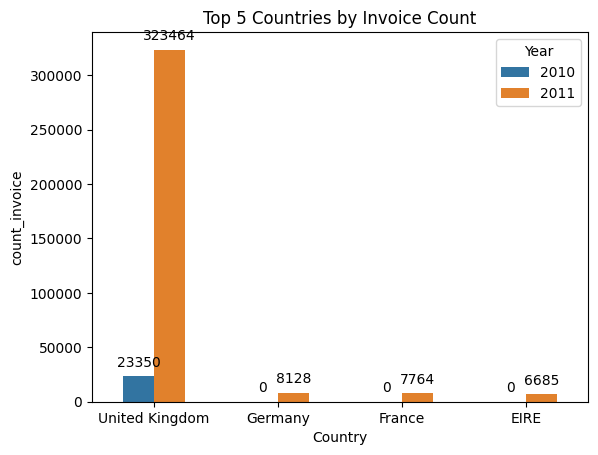

In [ ]:
#tìm country có lượng tiêu thụ hàng hóa nhiều nhất
table1 = table.groupby(['Country','Year'])['count_invoice'].sum().reset_index()
table1 = table1.sort_values(by = ['count_invoice'],ascending = False)
table1_ax =  sns.barplot(data = table1.head(5),x = 'Country',y = 'count_invoice', width = 0.5, hue = 'Year', estimator="sum", errorbar=None)
# Thêm giá trị trực tiếp lên thanh bar
for p in table1_ax.patches:
    table1_ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10)
table1_ax.set_title('Top 5 Countries by Invoice Count')
plt.show()

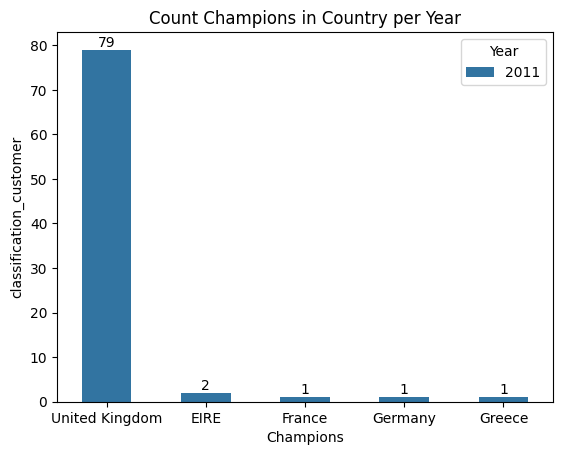

In [ ]:
#tìm demographic của những customer champions (cụ thể bài này có country)
table_champions = table[table['classification_customer'] == 'Champions']
count_champion = table_champions.groupby(['Country','Year'])['classification_customer'].count().reset_index()
count_champion = count_champion.sort_values(['Year','classification_customer'], ascending = False)
table2_ax = sns.barplot(data=count_champion.head(5), x='Country', y='classification_customer', width=0.5, hue = 'Year', estimator="sum", errorbar=None)
table2_ax.bar_label(table2_ax.containers[0], fontsize=10)
table2_ax.set_title('Count Champions in Country per Year')
table2_ax.set_xlabel('Champions')
plt.show()

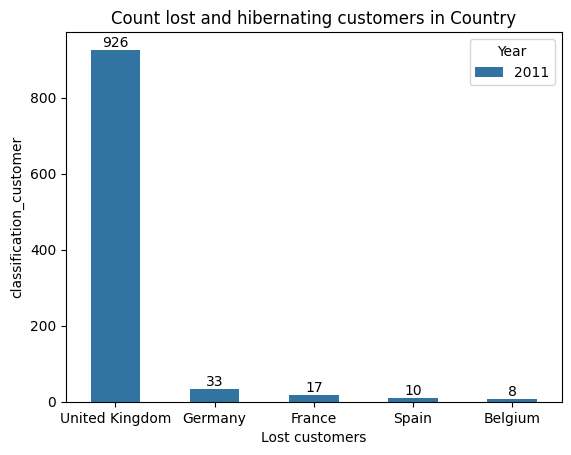

In [ ]:
table_lost = table[table['classification_customer'].isin(['Lost customers', 'Hibernating customers'])]
count_lost = table_lost.groupby(['Country','Year'])['classification_customer'].count().reset_index()
count_lost = count_lost.sort_values(['Year','classification_customer'], ascending = False)
table3_ax = sns.barplot(data=count_lost.head(5), x='Country', y='classification_customer',hue = 'Year', width=0.5, estimator="sum", errorbar=None)
table3_ax.bar_label(table3_ax.containers[0], fontsize=10)
table3_ax.set_title('Count lost and hibernating customers in Country')
table3_ax.set_xlabel('Lost customers')
plt.show()

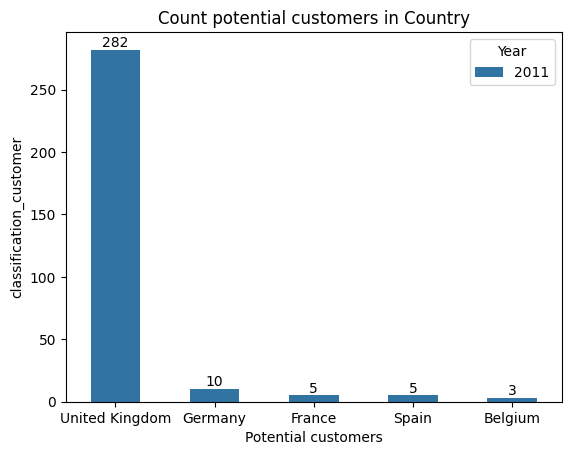

In [ ]:
table_potential = table[table['classification_customer'].isin(['Loyal', 'Potential Loyalist','Need Attention','About To Sleep','At Risk']) & table['R_Percentile'].isin([2,3]) & table['F_Percentile'].isin([2,3])]
count_potential = table_potential.groupby(['Country','Year'])['classification_customer'].count().reset_index()
count_potential = count_potential.sort_values(['Year','classification_customer'], ascending = False)
table4_ax = sns.barplot(data=count_potential.head(5), x='Country', y='classification_customer',hue = 'Year', width=0.5, estimator="sum", errorbar=None)
table4_ax.bar_label(table4_ax.containers[0], fontsize=10)
table4_ax.set_title('Count potential customers in Country')
table4_ax.set_xlabel('Potential customers')
plt.show()

Theo 1 thông tin ở trong bài báo trong đường link này:https://academicjournals.org/journal/AJBM/article-full-text-pdf/EB3418D18198

Khách hàng với lượng Recency thấp, nếu Frequency thấp sẽ có khả năng trở thành khách hàng tiềm năng hơn khách hàng có Frequency cao

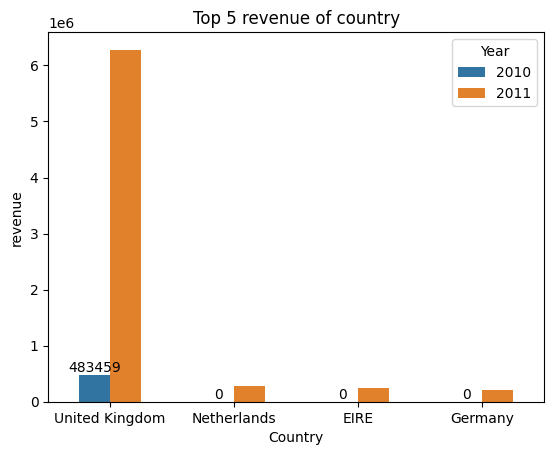

In [ ]:
table5 = table.groupby(['Country','Year'])['revenue'].sum().reset_index()
table5 = table5.sort_values(by = 'revenue',ascending = False)
table5_ax =  sns.barplot(data = table5.head(5),x = 'Country',y = 'revenue',hue = 'Year', width = 0.5, estimator="sum", errorbar=None)
table5_ax.bar_label(table5_ax.containers[0], fontsize=10)
table5_ax.set_title('Top 5 revenue of country')
plt.show()

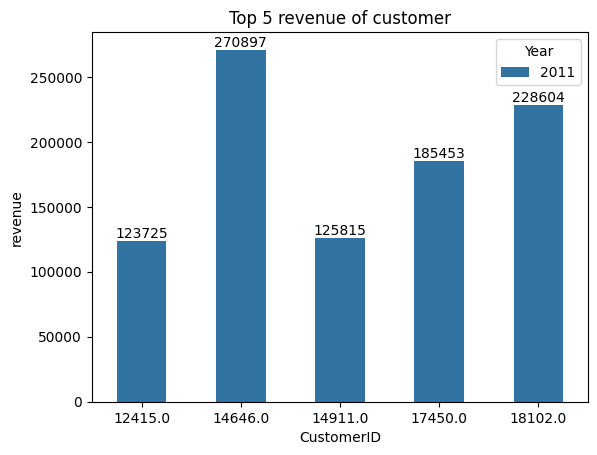

In [ ]:
table6 = table.sort_values(by = 'revenue',ascending = False)
table6_ax =  sns.barplot(data = table6.head(5),x = 'CustomerID',y = 'revenue',hue = 'Year', width = 0.5, estimator="sum", errorbar=None)
table6_ax.bar_label(table6_ax.containers[0], fontsize=10)
table6_ax.set_title('Top 5 revenue of customer')
plt.show()

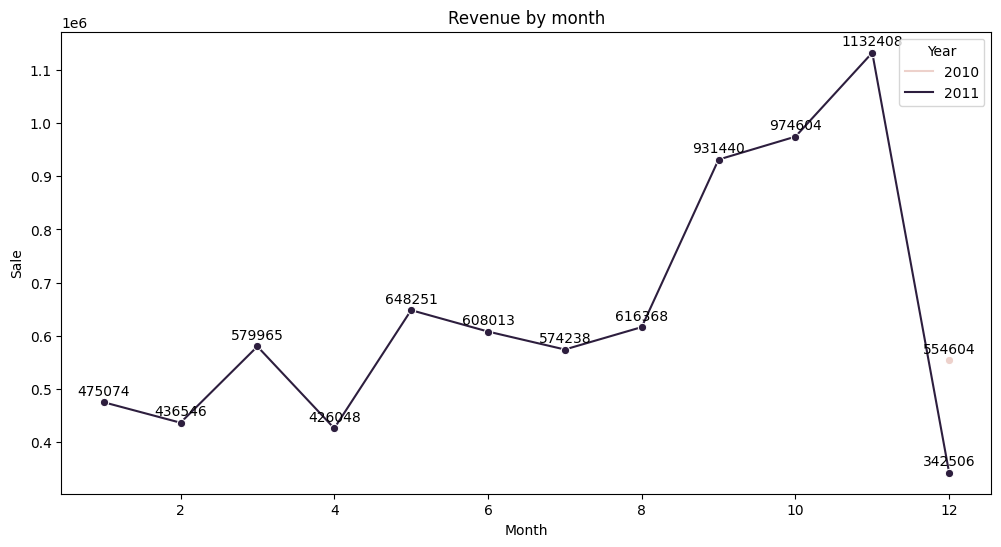

In [ ]:
table7 = a.groupby(['Year','Month'])['Sale'].sum().reset_index()
plt.figure(figsize=(12, 6))

table7_ax =  sns.lineplot(data = table7,x = 'Month',y = 'Sale',hue = 'Year', marker='o')
for line in table7_ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        table7_ax.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
table7_ax.set_title('Revenue by month')
plt.show()

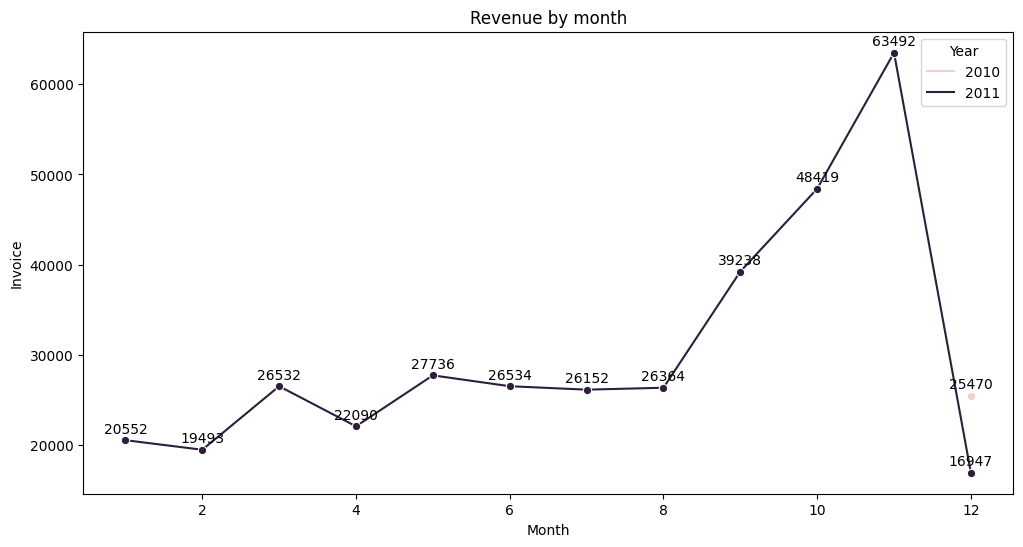

In [ ]:
table8 = a.groupby(['Year','Month'])['Invoice'].sum().reset_index()
plt.figure(figsize=(12, 6))

table8_ax =  sns.lineplot(data = table8,x = 'Month',y = 'Invoice',hue = 'Year', marker='o')
for line in table8_ax.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        table8_ax.annotate(f'{y:.0f}', (x, y), textcoords="offset points", xytext=(0, 5), ha='center')
table8_ax.set_title('Revenue by month')
plt.show()

- Nhìn vào doanh thu sản phẩm và lượng hóa đơn bán hàng ở trên, ta có thể nhận ra vào khoảng thời gian Quý 4 thì công ty có lượng tiêu thụ sản phẩm là lớn nhất, lượng mua hàng và doanh thu bán hàng cũng tăng đột biến
- Có thể thấy thị trường tiêu thụ ở United Kingdom là rất lớn, nên tập trung phát triển thị trường hơn ở khu vực này
- Với lượng khách hàng Champions ở từng khu vực, có thông tin về demographics của họ và có thể thêm 1 chút discount cũng như chương trình ưu đãi cho họ
- Với lượng khách hàng tiềm năng, có thể có những ưu đãi về việc mua hàng của họ, khiến cho việc mua hàng hấp dẫn hơn và lôi cuốn khách hàng hơn
- Với những Lost hoặc Hibernating Customer thì có thể đưa ra 1 số chương trình freeship hoặc giảm giá ship để hấp dẫn họ, hoặc có thể xin 1 chút feedback góp ý kết hợp với góp ý của các khách hàng trung thành và tiềm năng